In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPool2D, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing import image
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import pickle
from numpy import savetxt
import keras.layers as layers
from sklearn.model_selection import train_test_split
from google.colab import drive
#regularizers
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
early_stopping = EarlyStopping()
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
#optimizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the labels for the classes
labels = ['WATER', 
          'VINEGAR', 
          'TOMATO_SAUCE', 
          'TEA', 
          'SUGAR', 
          'SPICES', 
          'SODA', 
          'RICE',
          'PASTA', 
          'OIL', 
          'NUTS',
          'MILK',
          'JUICE', 
          'JAM', 
          'HONEY', 
          'FLOUR',
          'FISH',
          'CORN',
          'COFFEE',
          'CHOCOLATE',
          'CHIPS',
          'CEREAL',
          'CANDY',
          'CAKE',
          'BEANS',
          ]

In [ ]:
import os
import numpy as np
import cv2
"""
data_dir = 'drive/MyDrive/images'

# Load image paths and corresponding labels
image_paths = []
label_ids = []
for label_id, label_name in enumerate(labels):
    label_path = os.path.join(data_dir, label_name)
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        image_paths.append(image_path)
        label_ids.append(label_id)

# Load images and resize them to a fixed size
image_size = (128, 128)
images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    images.append(image)
images = np.array(images)

# Split data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, label_ids, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

"""
import h5py

with h5py.File('drive/MyDrive/Images_Noncolored_50000/train_images.h5', 'r') as hf:
    train_images = hf['train_images'][:]

with h5py.File('drive/MyDrive/Images_Noncolored_50000/train_labels.h5', 'r') as hf:
    train_labels = hf['train_labels'][:]

with h5py.File('drive/MyDrive/Images_Noncolored_50000/val_images.h5', 'r') as hf:
    val_images = hf['val_images'][:]

with h5py.File('drive/MyDrive/Images_Noncolored_50000/val_labels.h5', 'r') as hf:
    val_labels = hf['val_labels'][:]

with h5py.File('drive/MyDrive/Images_Noncolored_50000/test_images.h5', 'r') as hf:
    test_images = hf['test_images'][:]

with h5py.File('drive/MyDrive/Images_Noncolored_50000/test_labels.h5', 'r') as hf:
    test_labels = hf['test_labels'][:]


# Yeni Bölüm

In [ ]:
#normalize data, test (w/wo)
train_images = train_images / 255.
val_images = val_images / 255.
test_images = test_images / 255.

# Yeni Bölüm

In [ ]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [ ]:
# Print the shape of the train, validation, and test sets
print("Train images shape:", train_images.shape)
print("Train labels shape:", len(train_labels))
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", len(val_labels))
print("Test images shape:", test_images.shape)
print("Test labels shape:", len(test_labels))

Train images shape: (35000, 128, 128)
Train labels shape: 35000
Validation images shape: (11667, 128, 128)
Validation labels shape: 11667
Test images shape: (11667, 128, 128)
Test labels shape: 11667


PASTA


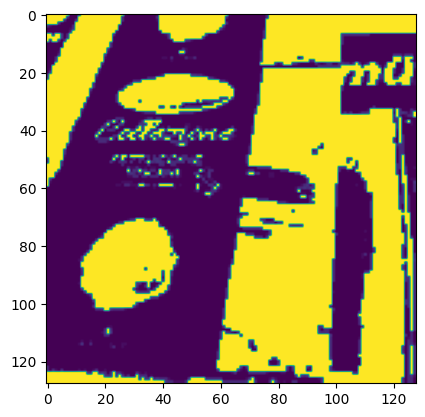

In [ ]:
# print an image from dset
i= 874
print(labels[train_labels[i]])
img = train_images[i,:,:]
plt.imshow(img)
plt.show()

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)



(35000, 128, 128)
(11667, 128, 128)
(11667, 128, 128)


In [ ]:
# Write a custom callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('Starting Training...')
    def on_epoch_begin(self,epoch,logs=None):
        print(f'Starting epoch {epoch}')
    def on_epoch_end(self,epoch,logs=None):
        print(f'Finished epoch {epoch}')
    def on_batch_begin(self,batch,logs=None):
        print(f'Training: Starting batch {batch}')
    def on_batch_end(self,batch,logs=None):
        print(f'Training: Finished batch {batch}')
    def on_train_end(self,logs=None):
        print('Finished Training')
        
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print('Starting Testing...')
    def on_test_batch_begin(self,batch,logs=None):
        print(f'Testing: Starting batch {batch}')
    def on_test_batch_end(self,batch,logs=None):
        print(f'Testing: Finished batch {batch}')
    def on_test_end(self,logs=None):
        print('Finished Testing')


In [ ]:
def get_mlp_model():
  model = Sequential();
  model.add(Flatten(input_shape = (128,128,1)))  # 0 input layer
  model.add(Dense(2048,activation='relu'))  # relu 3. layer
  model.add(Dropout(rate=0.5))
  model.add(Dense(2048,activation='relu'))  # relu 3. layer
  model.add(Dropout(rate=0.5))
  model.add(Dense(25,activation='softmax'))  # relu 4. layer
  #model.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
  #model.compile(optimizer = tf.optimizers.SGD(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
  return model



def get_cnn_model():
    model = Sequential();
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3))),
    model.add(MaxPooling2D((2,2))),
    model.add(Dropout(0.5)),
    model.add(Conv2D(128, (3,3), activation='relu')),
    model.add(MaxPooling2D((2,2))),
    model.add(Conv2D(256, (3,3), activation='relu')),
    model.add(MaxPooling2D((2,2))),
    model.add(Dropout(0.5)),
    #model.add(Conv2D(256, (3,3), activation='relu')),
    #model.add(MaxPooling2D((2,2))),
    model.add(Flatten()),
    model.add(Dense(256, activation='relu')),
    model.add(Dropout(0.5)),
    model.add(Dense(25, activation='softmax'))
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
    return model


def get_alexnet_model():
   model = keras.Sequential()
   model.add(layers.Conv2D(filters=32, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(128, 128, 1)))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
   model.add(layers.Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), activation="relu", padding="same"))
   model.add(layers.Dropout(0.5))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
   model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
   model.add(layers.Dropout(0.5))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),  strides=(1, 1), activation="relu",  padding="same"))
   model.add(layers.BatchNormalization())
   model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
   model.add(layers.Flatten())
   model.add(layers.Dense(512, activation="relu"))
   model.add(layers.Dropout(0.5))
   model.add(layers.Dense(25, activation="softmax"))
   model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy']
    )
   return model

def get_cnn_model2():
    model = Sequential();
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.5)) 
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))  
    model.add(Dropout(0.5)) 
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Flatten()),
    model.add(layers.Dense(25, activation='softmax'))

    model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=tf.optimizers.SGD(lr=0.001),
      metrics=['accuracy'])

    return model  

# early stopping


model_cnn = get_alexnet_model()
model_cnn.summary()

earlystopCB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) # adam without dropout, dense 16 , val_loss



#history = model.fit(train_images[...,np.newaxis],train_labels,epochs = 20,validation_data= (val_images,val_labels),batch_size=64, Verbose=False) # batchsize?


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        3904      
                                                                 
 batch_normalization_20 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 14, 14, 64)      

In [ ]:
history = model_cnn.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=50)

Epoch 1/50
547/547 [==============================] - 27s 45ms/step - loss: 3.1747 - accuracy: 0.1007 - val_loss: 3.4998 - val_accuracy: 0.0803
Epoch 2/50
547/547 [==============================] - 24s 44ms/step - loss: 2.9204 - accuracy: 0.1460 - val_loss: 3.1867 - val_accuracy: 0.1140
Epoch 3/50
547/547 [==============================] - 24s 44ms/step - loss: 2.7477 - accuracy: 0.1921 - val_loss: 3.5592 - val_accuracy: 0.1299
Epoch 4/50
547/547 [==============================] - 23s 43ms/step - loss: 2.6240 - accuracy: 0.2293 - val_loss: 2.9609 - val_accuracy: 0.2049
Epoch 5/50
547/547 [==============================] - 24s 43ms/step - loss: 2.4926 - accuracy: 0.2663 - val_loss: 2.6916 - val_accuracy: 0.2205
Epoch 6/50
547/547 [==============================] - 24s 44ms/step - loss: 2.3712 - accuracy: 0.3055 - val_loss: 2.9627 - val_accuracy: 0.2278
Epoch 7/50
547/547 [==============================] - 24s 44ms/step - loss: 2.2625 - accuracy: 0.3317 - val_loss: 3.2253 - val_accuracy:

[Text(0.5, 0, 'Epochs')]

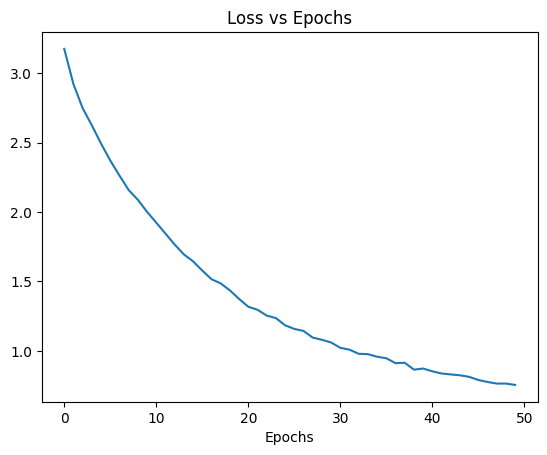

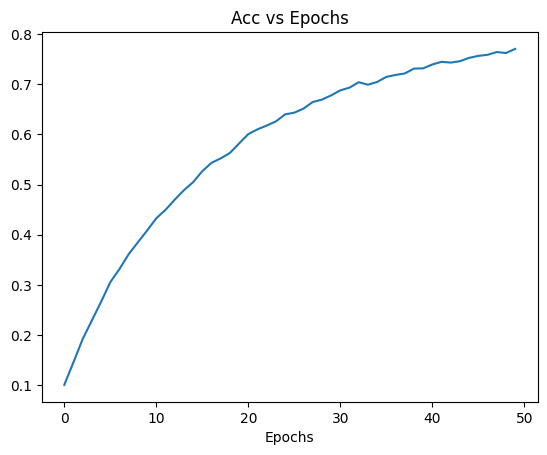

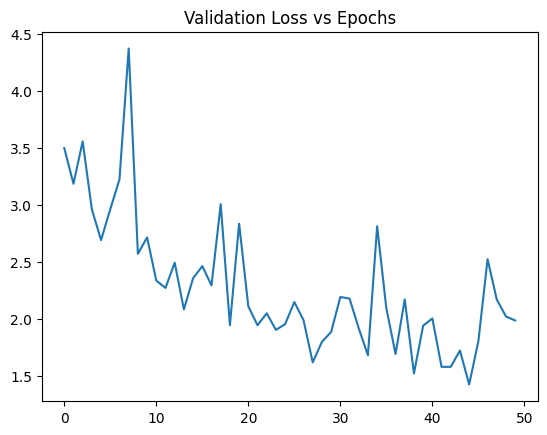

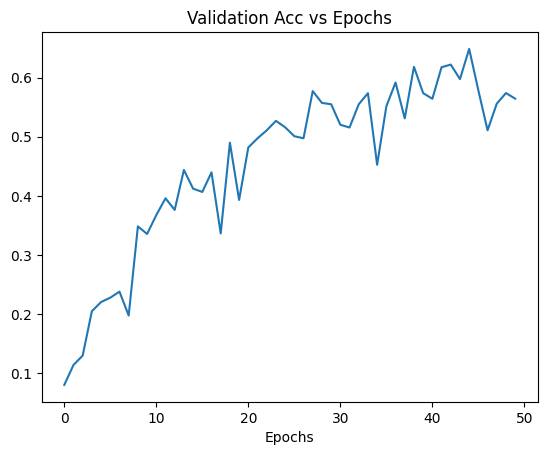

In [ ]:
df = pd.DataFrame(history.history)
df.head()
loss_plot = df.plot(y = 'loss' , title = 'Loss vs Epochs', legend= False)
loss_plot.set(xlabel='Epochs')

acc_plot = df.plot(y = 'accuracy' , title = 'Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')

loss_plot = df.plot(y = 'val_loss' , title = 'Validation Loss vs Epochs', legend= False)
#loss_plot.set(xlabel='Epochs')

acc_plot = df.plot(y = 'val_accuracy' , title = 'Validation Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')

In [ ]:
path = 'drive/MyDrive/'
file_name="cnn_model_trained_new.p"
# assume 'model' is your trained model
pickle_out = open(path+file_name,"wb")
pickle.dump(model_cnn, pickle_out)
pickle_out.close()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

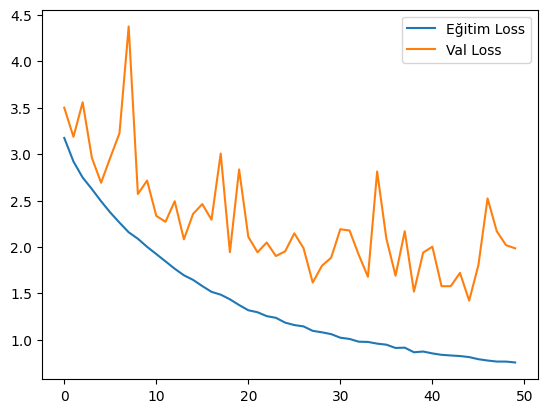

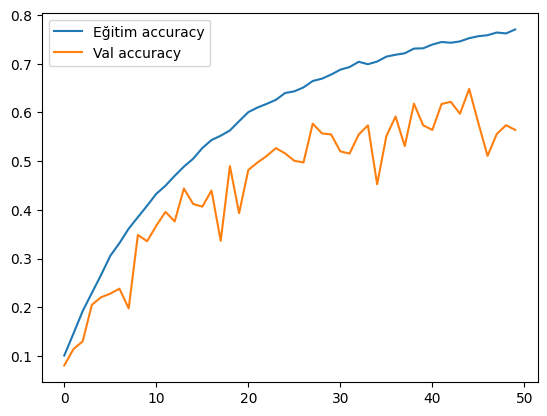

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Eğitim Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label = "Eğitim accuracy")
plt.plot(history.history["val_accuracy"], label = "Val accuracy")
plt.legend()
plt.show()

In [ ]:
score = model_cnn.evaluate(test_images, test_labels, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

365/365 [==============================] - 2s 7ms/step - loss: 2.0131 - accuracy: 0.5678
Test loss:  2.013087749481201
Test accuracy:  0.5677552223205566


365/365 [==============================] - 2s 6ms/step


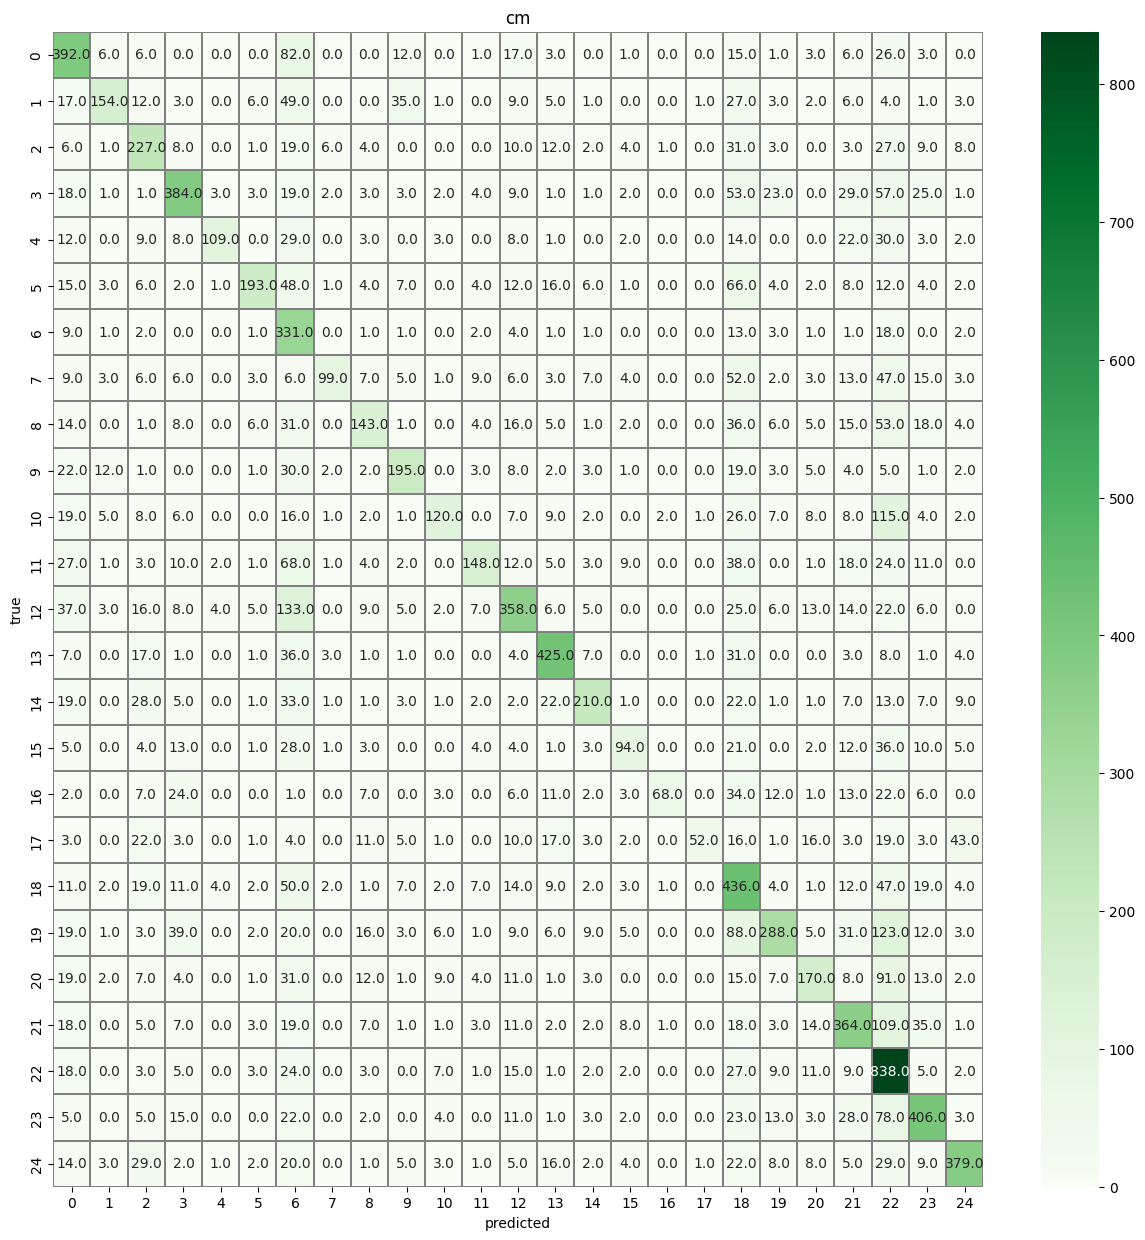

In [ ]:

y_pred = model_cnn.predict(val_images)
y_pred_class = np.argmax(y_pred, axis = 1)
Y_true = np.argmax(to_categorical(val_labels), axis = 1)
cm = confusion_matrix(Y_true, y_pred_class)
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".1f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("cm")
plt.show()

1/1 [==============================] - 0s 28ms/step


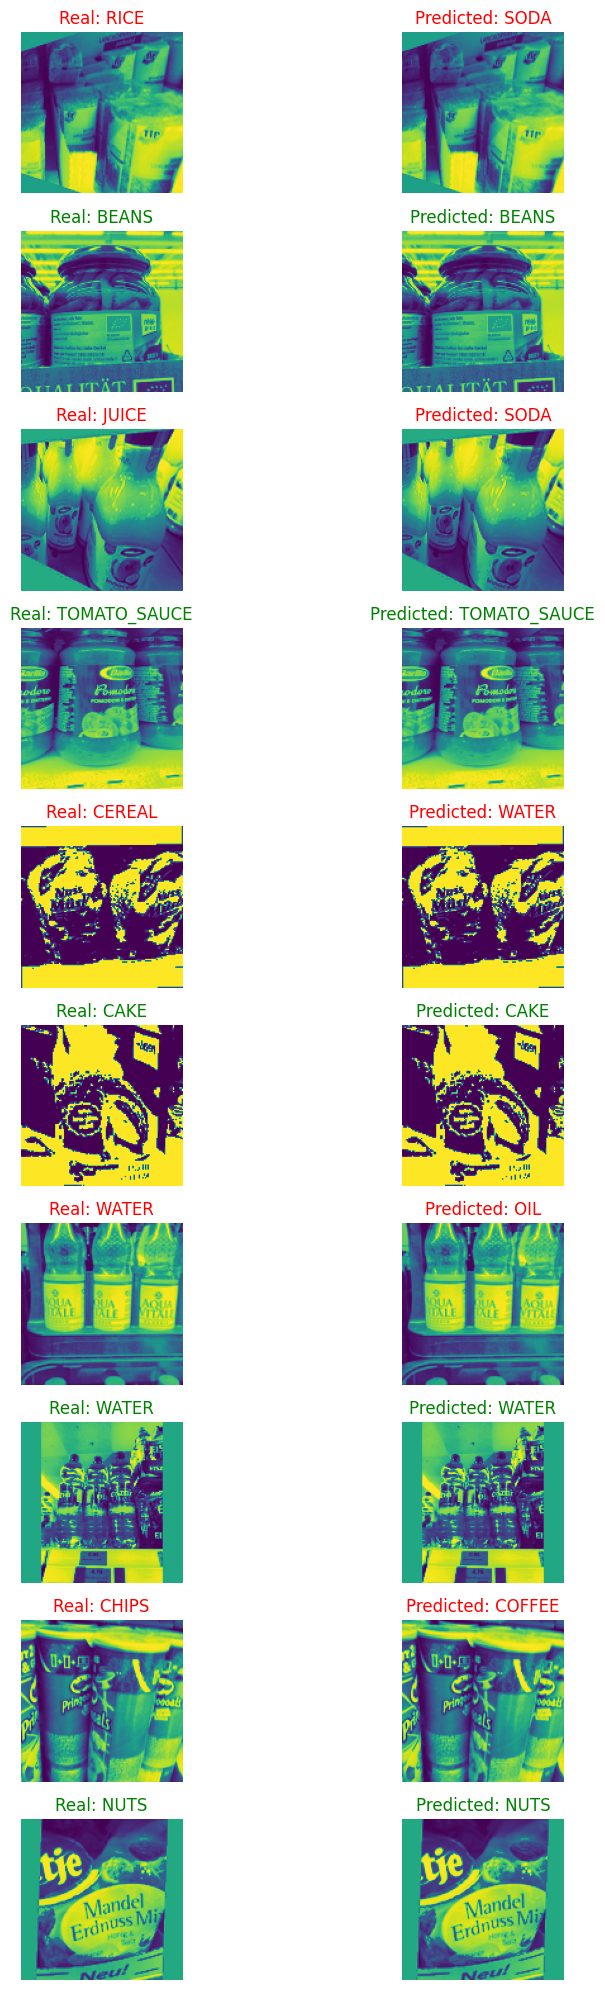

Accuracy: 50.00%


In [ ]:
num_examples_to_display = 10
example_indices = np.random.choice(range(len(test_images)), size=num_examples_to_display, replace=False)
example_images = test_images[example_indices]
example_labels = test_labels[example_indices]

predicted_labels = model_cnn.predict(example_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

fig, axes = plt.subplots(nrows=num_examples_to_display, ncols=2, figsize=(10, 20))

num_correct = 0
for i in range(num_examples_to_display):
    # Gerçek resimlerin kendilerini ve labellarını gösterme
    real_image = example_images[i]
    real_label = example_labels[i]
    axes[i, 0].imshow(real_image)
    axes[i, 0].set_title(f"Real: {labels[real_label]}")
    axes[i, 0].axis("off")

    # Tahmin edilen resimlerin kendilerini ve labellarını gösterme
    predicted_label = predicted_classes[i]
    predicted_name = labels[predicted_label]
    axes[i, 1].imshow(example_images[i])
    axes[i, 1].set_title(f"Predicted: {predicted_name}")
    axes[i, 1].axis("off")

# Tahmin edilen ve gerçek resimlerin labellerını karşılaştırma
    if predicted_name == labels[real_label]:
        color = 'green'
        num_correct += 1
        axes[i, 0].set_title(f"Real: {labels[real_label]}",color=color)
    else:
        color = 'red'
    axes[i, 1].set_title(f"Predicted: {predicted_name}", color=color)
    axes[i, 0].set_title(f"Real: {labels[real_label]}",color=color)

plt.tight_layout()
plt.show()

print(f"Accuracy: {num_correct / num_examples_to_display:.2%}")